In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [4]:
dtypes = {"age": "int64", "sex": "object", "salary": "object"}
df = pd.read_csv("../data/adult.csv", dtype=dtypes)
df = df[~df.isin(['?']).any(axis=1)]
mask1 = df['salary'].isin(['>50K', '<=50K'])
mask2 = ((df['salary'] == '>50K') & (df['salary K$'] > 50) | (df['salary'] == '<=50K') & (df['salary K$'] < 50))
if mask2.all():
    print("All values in 'salary K$' match values in 'salary' where 'salary' is '>50K'")
else:
    print("Values in 'salary K$' do not match values in 'salary' where 'salary' is '>50K'")
df = df[mask1]
df = df.reset_index(drop=True)
df.info()

All values in 'salary K$' match values in 'salary' where 'salary' is '>50K'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      30162 non-null  int64 
 1   age             30162 non-null  int64 
 2   workclass       30162 non-null  object
 3   education       30162 non-null  object
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   hours-per-week  30162 non-null  int64 
 10  native-country  30162 non-null  object
 11  salary          30162 non-null  object
 12  salary K$       30162 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.0+ MB


# Task 1
Print the count of men and women in the dataset.

In [22]:
count = df.groupby('sex')['sex'].count()
print(count)

sex
Female     9782
Male      20380
Name: sex, dtype: int64


# Task 2
Find the average age of men in dataset

In [23]:
men_df = df[df['sex'] == 'Male']
avg_age_men = men_df['age'].mean()
print("Average age of men:", avg_age_men)

Average age of men: 39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [24]:
poland_count = len(df[df["native-country"] == "Poland"])
percentage_poland = (poland_count / len(df)) * 100
print("Percentage of people from Poland: {:.2f}%".format(percentage_poland))

Percentage of people from Poland: 0.19%


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [25]:
high_income = df[df['salary'] == '>50K']
high_income_age_mean = high_income['age'].mean()
high_income_age_std = high_income['age'].std()
print("Mean age of people who earn >50K per year:", high_income_age_mean)
print("Standard deviation of age of people who earn >50K per year:", high_income_age_std)

low_income = df[df['salary'] == '<=50K']
low_income_age_mean = low_income['age'].mean()
low_income_age_std = low_income['age'].std()
print("Mean age of people who earn <=50K per year:", low_income_age_mean)
print("Standard deviation of age of people who earn <=50K per year:", low_income_age_std)

Mean age of people who earn >50K per year: 43.95911028236548
Standard deviation of age of people who earn >50K per year: 10.269632835673852
Mean age of people who earn <=50K per year: 36.60806038668668
Standard deviation of age of people who earn <=50K per year: 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [26]:
no_higher_edu = df.loc[(df['salary'] == '>50K') & ~(df['education'].isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']))]

if no_higher_edu.empty:
    print('There are no people with >50K salary and no higher education')
else:
    print('There are people with >50K salary and no higher education')

There are people with >50K salary and no higher education


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [27]:
df.groupby('education')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [28]:
men = df[(df['sex'] == 'Male') & (df['marital-status'].isin(['Never-married', 'Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent']))]
grouped = men.groupby(['marital-status', 'salary'])['salary'].count().unstack().fillna(0)
grouped['total'] = grouped['>50K'] + grouped['<=50K']
grouped['>50K_percent'] = grouped['>50K'] / grouped['total'] * 100
print(grouped)

salary                 <=50K  >50K  total  >50K_percent
marital-status                                         
Married-AF-spouse          5     4      9     44.444444
Married-civ-spouse      6886  5699  12585     45.284068
Married-spouse-absent    161    20    181     11.049724
Never-married           5107   307   5414      5.670484


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [29]:
max_hours = df['hours-per-week'].max()
num_people = len(df[df['hours-per-week'] == max_hours])

print(f"The maximum number of hours worked per week is {max_hours}")
print(f"{num_people} people work the same amount of hours per week")

The maximum number of hours worked per week is 99
78 people work the same amount of hours per week


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

<Axes: >

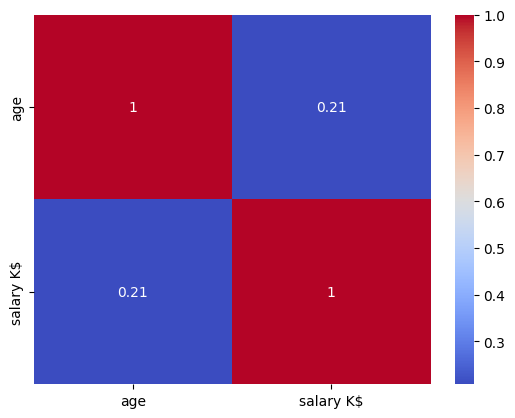

In [30]:
corr = df[['age', 'salary K$']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")